# Desafío 3 - Clasificación desde Machine Learning
Autor: Walther Becks

In [44]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score


In [2]:
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["figure.dpi"] = 200

## Desafío 2: Análisis exploratorio

In [4]:
df = pd.read_csv('default_credit.csv')
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


### Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.


C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


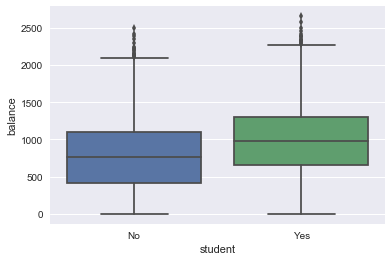

In [7]:
sns.boxplot(df['student'],df['balance'])

### Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


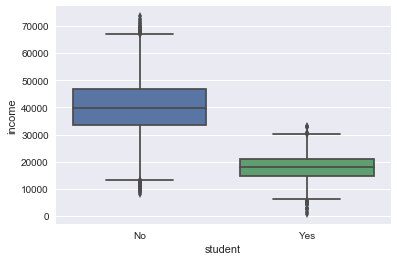

In [8]:
sns.boxplot(df['student'],df['income'])

### Un boxplot del balance total de las cuentas, segmentado por el status de default.

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


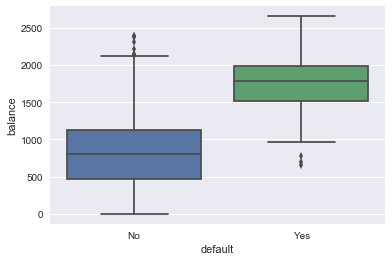

In [9]:
sns.boxplot(df['default'],df['balance'])

###  Un boxplot del ingreso total de cada cliente, segmentado por el status de default.

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


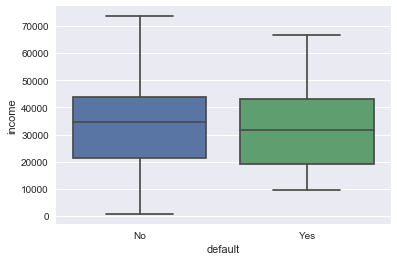

In [10]:
sns.boxplot(df['default'],df['income'])

### Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


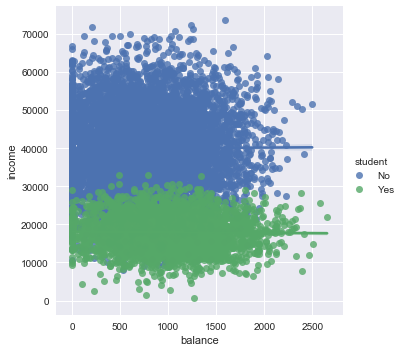

In [13]:
sns.lmplot('balance','income', df, hue='student')

### Un diagrama de dispersión entre balance e income, segmentado por el status de default.

C:\Users\Walther\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


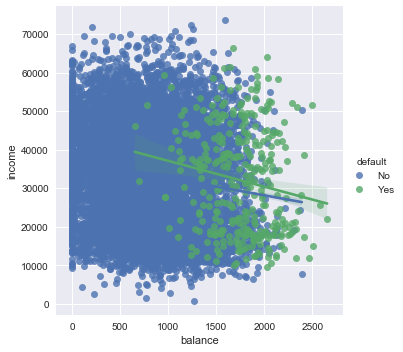

In [14]:
sns.lmplot('balance','income', df, hue='default')

## Desafío 3: Modelación econométrica

In [15]:
df['student_dm'] = np.where(df['student'] == 'Yes',1,0)
df['default_dm'] = np.where(df['default'] == 'Yes',1,0)

In [16]:
model1 = smf.logit('default_dm ~ balance + income + student_dm', df).fit()
model1.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_dm       AIC:              1579.5448  
Date:               2022-05-20 18:23 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
student_dm   -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

In [17]:
depure_model = smf.logit('default_dm ~ balance + student_dm', df).fit()
depure_model.summary2()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_dm       AIC:              1577.6816  
Date:               2022-05-20 18:24 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Intercept      -10.7495   0.3692 -29.1149 0.0000 -11.4731 -10.0259
balance          0.0057   0.0002  24.7485 0.0000   0.0053   0.0062
student_dm      -0.7149   0.1475  -4.8459 0.0000  -1.0040  -0.4257
==================================================================

"""

In [1]:
print("Podemos observar que al sacar income de la ecuación, el modelo se mantiene con la misma explicatividad")

Podemos observar que al sacar income de la ecuación, el modelo se mantiene con la misma explicatividad


## Desafío 4: Entrenar

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.loc[:,['balance','student_dm']],
                                                df['default_dm']
                                                ,test_size=.33
                                                ,random_state=11238)
# Estandarizar la matriz de entrenamiento
x_train_std = StandardScaler().fit_transform(x_train)
# Estandarizar la matriz de prueba
x_test_std = StandardScaler().fit_transform(x_test)

C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
default_model = LogisticRegression().fit(x_train,y_train)
default_model.coef_

C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.00428826, -0.64082535]])

In [27]:
print("Precisión: Mide la fracción de predicciones correctas en las etiquetas positivas")
print("Recall o sensibilidad: Mide la fracción de verdaderos positivos predichos por el modelo")

Precisión: Mide la fracción de predicciones correctas en las etiquetas positivas
Recall o sensibilidad: Mide la fracción de verdaderos positivos predichos por el modelo


In [28]:
yhat = default_model.predict(x_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3186
           1       0.76      0.25      0.37       114

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.87      0.62      0.68      3300
weighted avg       0.97      0.97      0.96      3300



In [31]:
m1_confusion = confusion_matrix(y_test,yhat)
m1_confusion

array([[3177,    9],
       [  86,   28]], dtype=int64)

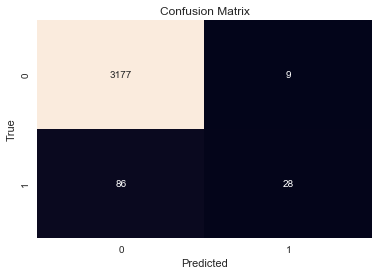

In [33]:
ax = plt.subplot()
sns.heatmap(m1_confusion,annot=True,fmt='g',ax=ax,cbar=False,);
ax.set_xlabel('Predicted');ax.set_ylabel('True');
ax.set_title('Confusion Matrix');

In [34]:
37/(37+14) # Precision

0.7254901960784313

In [35]:
(37+3172)/(37+77+14+3172) # accuracy

0.9724242424242424

In [37]:
accuracy_score(y_test,yhat)

0.9712121212121212

In [39]:
recall_score(y_test,yhat,average=None)

array([0.99717514, 0.24561404])

In [41]:
precision_score(y_test,yhat,average=None)

array([0.97364389, 0.75675676])

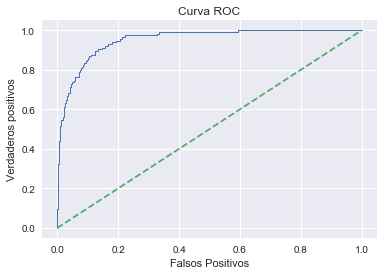

In [46]:
yhat2 = default_model.predict_proba(x_test)[:,1]
false_positive, true_positive, threshold = roc_curve(y_test,yhat2)
plt.title('Curva ROC')
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1],linestyle='--')
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos Positivos');


In [48]:
roc_auc_score(y_test,yhat)

0.6213945881653286

In [2]:
print("Podemos observar que aunque el modelo predice con gran precisión, esta lo hace para los casos de 0, debido a que la mayor parte de los datos se concentran allí. Este resultado resulta peligroso para casos más sensibles como por ejemplo la determinación de un cancer, debido a que el modelo no logra predecir con exactitud la presencia de este. Para realizar un trabajo de calidad, habrá que re entrenar el modelo con muestras más balanceadas.")

Podemos observar que aunque el modelo predice con gran precisión, esta lo hace para los casos de 0, debido a que la mayor parte de los datos se concentran allí. Este resultado resulta peligroso para casos más sensibles como por ejemplo la determinación de un cancer, debido a que el modelo no logra predecir con exactitud la presencia de este. Para realizar un trabajo de calidad, habrá que re entrenar el modelo con muestras más balanceadas.
